In [7]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
sys.path.append("/home/pervinco/BKAI_MetaPolyp")

import cv2
import yaml
import random
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt

from glob import glob
from data.batch_preprocess import load_img_mask
from utils.utils import decode_mask, decode_image, visualize

In [8]:
with open("/home/pervinco/BKAI_MetaPolyp/config.yaml", "r") as f:
    config = yaml.safe_load(f)

data_dir = config["data_dir"]
image_dir = f"{data_dir}/train"
mask_dir = f"{data_dir}/train_mask"
gt_dir = f"{data_dir}/train_gt"

image_files = sorted(glob(f"{image_dir}/*"))
mask_files = sorted(glob(f"{mask_dir}/*"))
gt_files = sorted(glob(f"{gt_dir}/*"))


In [9]:
def get_bounding_boxes(mask):
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)


    # contours 찾기
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    bounding_boxes = []
    for contour in contours:
        # 각 contour에 대한 bounding box 좌표 구하기
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))
    
    return bounding_boxes

[(162, 86, 62, 39)]


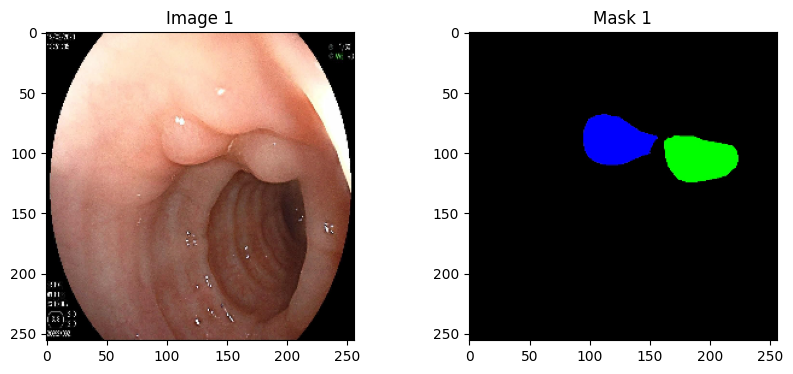

In [10]:
idx = random.randint(0, len(image_files)-1)
image_file, mask_file = image_files[107], mask_files[107]
image, mask = load_img_mask(image_file, mask_file, size=config["img_size"])

bboxes = get_bounding_boxes(mask)
print(bboxes)

visualize([image], [mask])